# Numerical construction of MPO

In [1]:
import numpy as np
import sympy

from pympo import (
    AssignManager,
    OpSite,
    SumOfProducts,
)

In [2]:
HenonHeiles = SumOfProducts([])
omega = sympy.Symbol("omega")
lam = sympy.Symbol("lambda")
ndim = 4

ints_p2 = np.ones((3, 3))
ints_q = np.ones((3,))
ints_q2 = np.ones((3,))
ints_q3 = np.ones((3,))

p2_ops = [OpSite(r"\hat{p}^2" + f"_{i}", i, value=ints_p2) for i in range(ndim)]
q2_ops = [OpSite(r"\hat{q}^2" + f"_{i}", i, value=ints_q2) for i in range(ndim)]
q_ops = [OpSite(r"\hat{q}" + f"_{i}", i, value=ints_q) for i in range(ndim)]
q3_ops = [OpSite(r"\hat{q}^3" + f"_{i}", i, value=ints_q3) for i in range(ndim)]
for i in range(ndim):
    HenonHeiles += p2_ops[i] * (omega / 2)
    HenonHeiles += q2_ops[i] * (omega / 2)

for i in range(ndim - 1):
    HenonHeiles += q2_ops[i] * q_ops[i + 1] * lam
    HenonHeiles -= q3_ops[i + 1] * (lam / 3)

HenonHeiles = HenonHeiles.simplify()
print(f"{HenonHeiles.ndim=}, {HenonHeiles.nops=}")
display(HenonHeiles.symbol)

HenonHeiles.ndim=4, HenonHeiles.nops=10


lambda*\hat{q}^2_0*\hat{q}_1 + lambda*\hat{q}^2_1*\hat{q}_2 + lambda*\hat{q}^2_2*\hat{q}_3 - lambda*\hat{q}^3_1/3 - lambda*\hat{q}^3_2/3 - lambda*\hat{q}^3_3/3 + omega*(\hat{p}^2_0 + \hat{q}^2_0)/2 + omega*(\hat{p}^2_1 + \hat{q}^2_1)/2 + omega*(\hat{p}^2_2 + \hat{q}^2_2)/2 + omega*(\hat{p}^2_3 + \hat{q}^2_3)/2

In [3]:
am = AssignManager(HenonHeiles)
display(*am.Wsym)

None

None

None

None

In [4]:
am.assign()
display(*am.Wsym)

2024-12-31 13:50:19.582 | INFO     | pympo.bipartite:assign:282 - assigned 1/4
2024-12-31 13:50:19.583 | INFO     | pympo.bipartite:assign:282 - assigned 2/4
2024-12-31 13:50:19.584 | INFO     | pympo.bipartite:assign:282 - assigned 3/4
2024-12-31 13:50:19.585 | INFO     | pympo.bipartite:assign:282 - assigned 4/4


Matrix([[omega*(\hat{p}^2_0 + \hat{q}^2_0)/2, 1, lambda*\hat{q}^2_0]])

Matrix([
[                 0, 0,                                                           1],
[lambda*\hat{q}^2_1, 1, -lambda*\hat{q}^3_1/3 + omega*(\hat{p}^2_1 + \hat{q}^2_1)/2],
[                 0, 0,                                                   \hat{q}_1]])

Matrix([
[                 0,                                                   \hat{q}_2, 0],
[lambda*\hat{q}^2_2, -lambda*\hat{q}^3_2/3 + omega*(\hat{p}^2_2 + \hat{q}^2_2)/2, 1],
[                 0,                                                           1, 0]])

Matrix([
[                                                  \hat{q}_3],
[                                                          1],
[-lambda*\hat{q}^3_3/3 + omega*(\hat{p}^2_3 + \hat{q}^2_3)/2]])

In [5]:
W_prod = sympy.Mul(*am.Wsym)
print(*[f"W{i}" for i in range(am.ndim)], "=")
display(W_prod[0].expand())

W0 W1 W2 W3 =


lambda*\hat{q}^2_0*\hat{q}_1 + lambda*\hat{q}^2_1*\hat{q}_2 + lambda*\hat{q}^2_2*\hat{q}_3 - lambda*\hat{q}^3_1/3 - lambda*\hat{q}^3_2/3 - lambda*\hat{q}^3_3/3 + omega*\hat{p}^2_0/2 + omega*\hat{p}^2_1/2 + omega*\hat{p}^2_2/2 + omega*\hat{p}^2_3/2 + omega*\hat{q}^2_0/2 + omega*\hat{q}^2_1/2 + omega*\hat{q}^2_2/2 + omega*\hat{q}^2_3/2

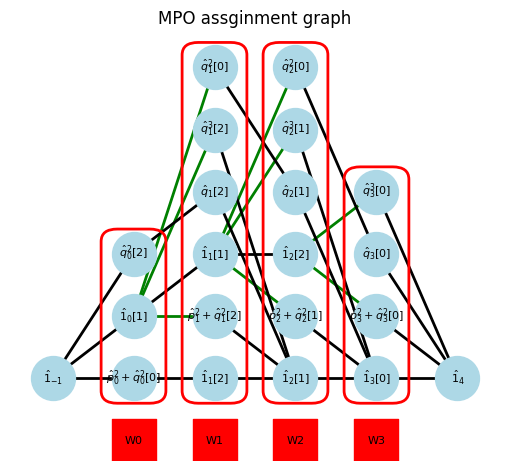

In [6]:
am.show_graph()

In [7]:
mpo = am.numerical_mpo(
    subs={omega: 2.0, lam: 1.0}
)  # subs is not necessary if you define its value in advance.
mpo

[array([[[[2.+0.j, 1.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j]],
 
         [[1.+0.j, 0.+0.j, 0.+0.j],
          [2.+0.j, 1.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j]],
 
         [[1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j],
          [2.+0.j, 1.+0.j, 1.+0.j]]]]),
 array([[[[0.        +0.j, 0.        +0.j, 1.        +0.j],
          [0.        +0.j, 0.        +0.j, 0.        +0.j],
          [0.        +0.j, 0.        +0.j, 0.        +0.j]],
 
         [[0.        +0.j, 0.        +0.j, 0.        +0.j],
          [0.        +0.j, 0.        +0.j, 1.        +0.j],
          [0.        +0.j, 0.        +0.j, 0.        +0.j]],
 
         [[0.        +0.j, 0.        +0.j, 0.        +0.j],
          [0.        +0.j, 0.        +0.j, 0.        +0.j],
          [0.        +0.j, 0.        +0.j, 1.        +0.j]]],
 
 
        [[[1.        +0.j, 1.        +0.j, 1.66666667+0.j],
          [0.        +0.j, 0.        +0.j, 1.        +

In [8]:
dump = None
for core in mpo:
    if dump is None:
        dump = core[0, 0, 0, :]
    else:
        dump = np.einsum("i,ij->j", dump, core[:, 0, 0, :])